In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score,classification_report
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud
import re
import warnings
warnings.filterwarnings("ignore")

 # Multi-page web-scraping

In [2]:
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook

In [3]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer':'https://www.amazon.in/Pride-Lite-Headphones-Cancelling-Tangle-Free/product-reviews/B08SFFS6CK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

# Looping through multiple pages

In [4]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [5]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', '').strip()}
            reviewlist.append(review)
    except:
        pass

In [6]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/Pride-Lite-Headphones-Cancelling-Tangle-Free/product-reviews/B08SFFS6CK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

In [7]:
# Save results to a Dataframe, then export as CSV

In [8]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNot upto the mark,3.0,This is my second purchase of this same produc...,Reviewed in India on 21 October 2023
1,4.0 out of 5 stars\nAwesome,4.0,Nice product. Metal body,Reviewed in India on 25 October 2023
2,4.0 out of 5 stars\nGood,4.0,Good,Reviewed in India on 26 October 2023
3,3.0 out of 5 stars\nNeed more wire quality,3.0,Performance wise this head was too amazing.But...,Reviewed in India on 25 October 2023
4,4.0 out of 5 stars\nGood when compare to CHINA...,4.0,Good in that price,Reviewed in India on 24 October 2023
...,...,...,...,...
1295,3.0 out of 5 stars\nGood for the price range a...,3.0,Pretty crisp and nice sound good for that budg...,Reviewed in India on 15 October 2023
1296,3.0 out of 5 stars\nUsed product and left side...,3.0,Used product was sent. Was having earwax. The ...,Reviewed in India on 20 October 2023
1297,4.0 out of 5 stars\nOk,4.0,Gud,Reviewed in India on 17 October 2023
1298,3.0 out of 5 stars\nReview,3.0,It is good in quality bass is also goodMic is ...,Reviewed in India on 17 October 2023


In [9]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on'," ", regex=True)

In [10]:
df.head()

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNot upto the mark,3.0,This is my second purchase of this same produc...,21 October 2023
1,4.0 out of 5 stars\nAwesome,4.0,Nice product. Metal body,25 October 2023
2,4.0 out of 5 stars\nGood,4.0,Good,26 October 2023
3,3.0 out of 5 stars\nNeed more wire quality,3.0,Performance wise this head was too amazing.But...,25 October 2023
4,4.0 out of 5 stars\nGood when compare to CHINA...,4.0,Good in that price,24 October 2023


In [11]:
df.to_csv('OneplusReview.csv')

In [12]:
# Load Dataset
reviews = pd.read_csv('OneplusReview.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews.head(11)

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNot upto the mark,3.0,This is my second purchase of this same produc...,21 October 2023
1,4.0 out of 5 stars\nAwesome,4.0,Nice product. Metal body,25 October 2023
2,4.0 out of 5 stars\nGood,4.0,Good,26 October 2023
3,3.0 out of 5 stars\nNeed more wire quality,3.0,Performance wise this head was too amazing.But...,25 October 2023
4,4.0 out of 5 stars\nGood when compare to CHINA...,4.0,Good in that price,24 October 2023
5,3.0 out of 5 stars\nGood for the price range a...,3.0,Pretty crisp and nice sound good for that budg...,15 October 2023
6,3.0 out of 5 stars\nUsed product and left side...,3.0,Used product was sent. Was having earwax. The ...,20 October 2023
7,4.0 out of 5 stars\nOk,4.0,Gud,17 October 2023
8,3.0 out of 5 stars\nReview,3.0,It is good in quality bass is also goodMic is ...,17 October 2023
9,3.0 out of 5 stars\nTips of the earphone are b...,3.0,Ofcourse sound quality is nice and earphone is...,7 October 2023


### EDA

In [13]:
reviews.Rating.describe()

count    1300.000000
mean        3.400000
std         0.490086
min         3.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Rating, dtype: float64

In [14]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        1300 non-null   object 
 1   Rating       1300 non-null   float64
 2   Review       1300 non-null   object 
 3   Review_Date  1300 non-null   object 
dtypes: float64(1), object(3)
memory usage: 40.8+ KB


In [15]:
reviews.isnull().any()

Title          False
Rating         False
Review         False
Review_Date    False
dtype: bool

## Data Visualization
## Date vs Review Count

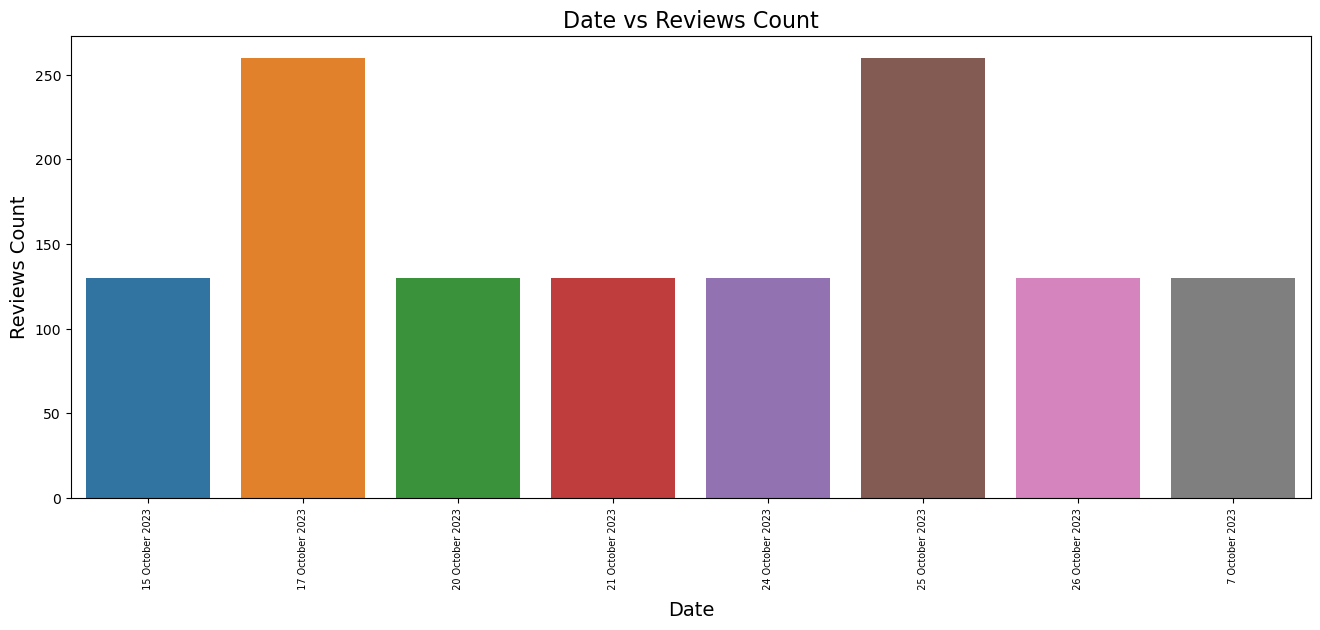

In [16]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()


In [17]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    His is my second purchase of this same product...
1                             Vice product. Metal body
2                                                 Good
3    Performance wise this head was too amazing.But...
4                                   Good in that price
Name: Review, dtype: object

In [18]:
OnePlus_rvw = reviews[['Review']]
OnePlus_rvw

,Review
0,This is my second purchase of this same produc...
1,Nice product. Metal body
2,Good
3,Performance wise this head was too amazing.But...
4,Good in that price
...,...
1295,Pretty crisp and nice sound good for that budg...
1296,Used product was sent. Was having earwax. The ...
1297,Gud
1298,It is good in quality bass is also goodMic is ...


### Resetting index

In [19]:
OnePlus_rvw.reset_index(drop=True, inplace=True)

In [20]:
OnePlus_rvw

,Review
0,This is my second purchase of this same produc...
1,Nice product. Metal body
2,Good
3,Performance wise this head was too amazing.But...
4,Good in that price
...,...
1295,Pretty crisp and nice sound good for that budg...
1296,Used product was sent. Was having earwax. The ...
1297,Gud
1298,It is good in quality bass is also goodMic is ...


## Creating function for Remove the punctuation and Stop words

In [21]:
#Creating function for Remove the punctuation and Stop words
def cleanwords(title):
    no_punc= [x for x in title if x not in string.punctuation]
    no_pun=''.join(no_punc)
    return [x for x in no_pun.split() if x.lower() not in stopwords.words('english')]

In [22]:
OnePlus_rvw['Review']=OnePlus_rvw['Review'].replace(OnePlus_rvw['Review'].apply(cleanwords))

In [23]:
OnePlus_rvw

,Review
0,This is my second purchase of this same produc...
1,Nice product. Metal body
2,Good
3,Performance wise this head was too amazing.But...
4,Good in that price
...,...
1295,Pretty crisp and nice sound good for that budg...
1296,Used product was sent. Was having earwax. The ...
1297,Gud
1298,It is good in quality bass is also goodMic is ...


In [24]:
OnePlus_rvw['Reviews']=OnePlus_rvw['Review'].apply(cleanwords)
OnePlus_rvw=OnePlus_rvw.drop('Review',axis=1)
OnePlus_rvw

,Reviews
0,"[second, purchase, product, Last, time, lasted..."
1,"[Nice, product, Metal, body]"
2,[Good]
3,"[Performance, wise, head, amazingBut, wire, qu..."
4,"[Good, price]"
...,...
1295,"[Pretty, crisp, nice, sound, good, budget, rea..."
1296,"[Used, product, sent, earwax, left, side, audi..."
1297,[Gud]
1298,"[good, quality, bass, also, goodMic, decent]"


# Text Pre-processing Techniques


### 1. Removing links (http | https)

In [25]:
cleaned_reviews = []

for index, row in OnePlus_rvw.iterrows():
    words_without_links = [word for word in row.Reviews if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

OnePlus_rvw['Reviews'] = cleaned_reviews
OnePlus_rvw.head(10)

,Reviews
0,second purchase product Last time lasted 8 mon...
1,Nice product Metal body
2,Good
3,Performance wise head amazingBut wire quality ...
4,Good price
5,Pretty crisp nice sound good budget reason giv...
6,Used product sent earwax left side audible low...
7,Gud
8,good quality bass also goodMic decent
9,Ofcourse sound quality nice earphone light wei...


 ### 2. Removing Review with empty text

In [26]:
dataframe = OnePlus_rvw[OnePlus_rvw['Reviews']!='']
dataframe.head(10)

,Reviews
0,second purchase product Last time lasted 8 mon...
1,Nice product Metal body
2,Good
3,Performance wise head amazingBut wire quality ...
4,Good price
5,Pretty crisp nice sound good budget reason giv...
6,Used product sent earwax left side audible low...
7,Gud
8,good quality bass also goodMic decent
9,Ofcourse sound quality nice earphone light wei...


### 3. Dropping duplicate rows

In [27]:
dataframe.drop_duplicates(subset=['Reviews'], keep=False)
dataframe.head(10)

,Reviews
0,second purchase product Last time lasted 8 mon...
1,Nice product Metal body
2,Good
3,Performance wise head amazingBut wire quality ...
4,Good price
5,Pretty crisp nice sound good budget reason giv...
6,Used product sent earwax left side audible low...
7,Gud
8,good quality bass also goodMic decent
9,Ofcourse sound quality nice earphone light wei...


### 4. Function to remove emoji

In [28]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [29]:
dataframe['Reviews']=dataframe['Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Reviews
0,second purchase product Last time lasted 8 mon...
1,Nice product Metal body
2,Good
3,Performance wise head amazingBut wire quality ...
4,Good price
5,Pretty crisp nice sound good budget reason giv...
6,Used product sent earwax left side audible low...
7,Gud
8,good quality bass also goodMic decent
9,Ofcourse sound quality nice earphone light wei...


### 5. Tokenize 'Reviews'

In [30]:
TextBlob(dataframe['Reviews'][1]).words

WordList(['Nice', 'product', 'Metal', 'body'])

In [31]:
tokenized_review = dataframe['Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [second, purchase, product, Last, time, lasted...
1                         [Nice, product, Metal, body]
2                                               [Good]
3    [Performance, wise, head, amazingBut, wire, qu...
4                                        [Good, price]
5    [Pretty, crisp, nice, sound, good, budget, rea...
6    [Used, product, sent, earwax, left, side, audi...
7                                                [Gud]
8         [good, quality, bass, also, goodMic, decent]
9    [Ofcourse, sound, quality, nice, earphone, lig...
Name: Reviews, dtype: object

In [32]:
dataframe['Tokenized_Reviews'] = dataframe['Reviews'].apply(lambda x: word_tokenize(x))
dataframe.head(10)

,Reviews,Tokenized_Reviews
0,second purchase product Last time lasted 8 mon...,"[second, purchase, product, Last, time, lasted..."
1,Nice product Metal body,"[Nice, product, Metal, body]"
2,Good,[Good]
3,Performance wise head amazingBut wire quality ...,"[Performance, wise, head, amazingBut, wire, qu..."
4,Good price,"[Good, price]"
5,Pretty crisp nice sound good budget reason giv...,"[Pretty, crisp, nice, sound, good, budget, rea..."
6,Used product sent earwax left side audible low...,"[Used, product, sent, earwax, left, side, audi..."
7,Gud,[Gud]
8,good quality bass also goodMic decent,"[good, quality, bass, also, goodMic, decent]"
9,Ofcourse sound quality nice earphone light wei...,"[Ofcourse, sound, quality, nice, earphone, lig..."


### 6. Converting words to Stemmer

In [33]:
stemmer =  PorterStemmer()

In [34]:
dataframe['Reviews'].replace(dataframe['Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()])))
dataframe

,Reviews,Tokenized_Reviews
0,second purchase product Last time lasted 8 mon...,"[second, purchase, product, Last, time, lasted..."
1,Nice product Metal body,"[Nice, product, Metal, body]"
2,Good,[Good]
3,Performance wise head amazingBut wire quality ...,"[Performance, wise, head, amazingBut, wire, qu..."
4,Good price,"[Good, price]"
...,...,...
1295,Pretty crisp nice sound good budget reason giv...,"[Pretty, crisp, nice, sound, good, budget, rea..."
1296,Used product sent earwax left side audible low...,"[Used, product, sent, earwax, left, side, audi..."
1297,Gud,[Gud]
1298,good quality bass also goodMic decent,"[good, quality, bass, also, goodMic, decent]"


### 7. Converting words to Lemma

In [35]:
word_lemmatizer = WordNetLemmatizer()

dataframe['Reviews'].replace(dataframe['Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()])))

dataframe

,Reviews,Tokenized_Reviews
0,second purchase product Last time lasted 8 mon...,"[second, purchase, product, Last, time, lasted..."
1,Nice product Metal body,"[Nice, product, Metal, body]"
2,Good,[Good]
3,Performance wise head amazingBut wire quality ...,"[Performance, wise, head, amazingBut, wire, qu..."
4,Good price,"[Good, price]"
...,...,...
1295,Pretty crisp nice sound good budget reason giv...,"[Pretty, crisp, nice, sound, good, budget, rea..."
1296,Used product sent earwax left side audible low...,"[Used, product, sent, earwax, left, side, audi..."
1297,Gud,[Gud]
1298,good quality bass also goodMic decent,"[good, quality, bass, also, goodMic, decent]"


### 8. Removing Punctuations, Numbers and Special characters

In [36]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [37]:
dataframe['Reviews'] = dataframe['Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Reviews,Tokenized_Reviews
0,second purchase product last time lasted mont...,"[second, purchase, product, Last, time, lasted..."
1,nice product metal body,"[Nice, product, Metal, body]"
2,good,[Good]
3,performance wise head amazingbut wire quality ...,"[Performance, wise, head, amazingBut, wire, qu..."
4,good price,"[Good, price]"
5,pretty crisp nice sound good budget reason giv...,"[Pretty, crisp, nice, sound, good, budget, rea..."
6,used product sent earwax left side audible low...,"[Used, product, sent, earwax, left, side, audi..."
7,gud,[Gud]
8,good quality bass also goodmic decent,"[good, quality, bass, also, goodMic, decent]"
9,ofcourse sound quality nice earphone light wei...,"[Ofcourse, sound, quality, nice, earphone, lig..."


### Countvectorizer (Creating the Bag of Words model)

In [38]:
cv = CountVectorizer(analyzer=cleanwords,ngram_range=(1,3))
count_vec = cv.fit_transform(dataframe['Reviews']).toarray()

In [39]:
count_vec.shape

(1300, 89)

In [40]:
cv.get_feature_names_out()[:100]

array(['also', 'amazingbut', 'amazon', 'audible', 'bad', 'bass', 'better',
       'body', 'budget', 'build', 'cable', 'came', 'cap', 'checked',
       'comes', 'coming', 'condition', 'coz', 'crisp', 'cut', 'decent',
       'detached', 'due', 'durability', 'earphone', 'earwax', 'easily',
       'everytime', 'expect', 'fine', 'force', 'giving', 'good',
       'goodmic', 'great', 'gud', 'hand', 'havent', 'head', 'headphones',
       'improve', 'last', 'lasted', 'left', 'light', 'low', 'mark',
       'metal', 'mic', 'months', 'need', 'nice', 'nowadays', 'ofcourse',
       'one', 'performance', 'phone', 'photo', 'pretty', 'price',
       'product', 'ptron', 'purchase', 'quality', 'question', 'really',
       'reason', 'received', 'receiving', 'review', 'rs', 'second', 'see',
       'sent', 'side', 'slightly', 'small', 'sound', 'stars', 'stopped',
       'time', 'unplug', 'used', 'voice', 'weight', 'wire', 'wise',
       'writing', 'yet'], dtype=object)

In [41]:
cv.get_params()

{'analyzer': <function __main__.cleanwords(title)>,
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [42]:
count_df = pd.DataFrame(count_vec, columns=cv.get_feature_names_out())
count_df

,also,amazingbut,amazon,audible,bad,bass,better,body,budget,build,...,stopped,time,unplug,used,voice,weight,wire,wise,writing,yet
0,0,0,0,0,0,0,1,0,0,0,...,1,2,1,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1296,0,0,1,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
1297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1298,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TFIDF Transformer

In [43]:
tfidf = TfidfTransformer()
# TF-IDF feature matrix
tf_idf = tfidf.fit_transform(count_vec)

In [44]:
tf_idf.shape

(1300, 89)

###  Fetch sentiments Using TextBlob

In [45]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [46]:
sentiments_using_textblob = dataframe.Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Reviews
pos,1170
neg,130


### Let's calculate subjectivity and Polarity

In [47]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Reviews.apply(calc_pola)
dataframe.head()

,Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,second purchase product last time lasted mont...,"[second, purchase, product, Last, time, lasted...",0.266667,0.229167
1,nice product metal body,"[Nice, product, Metal, body]",1.000000,0.600000
2,good,[Good],0.600000,0.700000
3,performance wise head amazingbut wire quality ...,"[Performance, wise, head, amazingBut, wire, qu...",0.480556,0.136111
4,good price,"[Good, price]",0.600000,0.700000


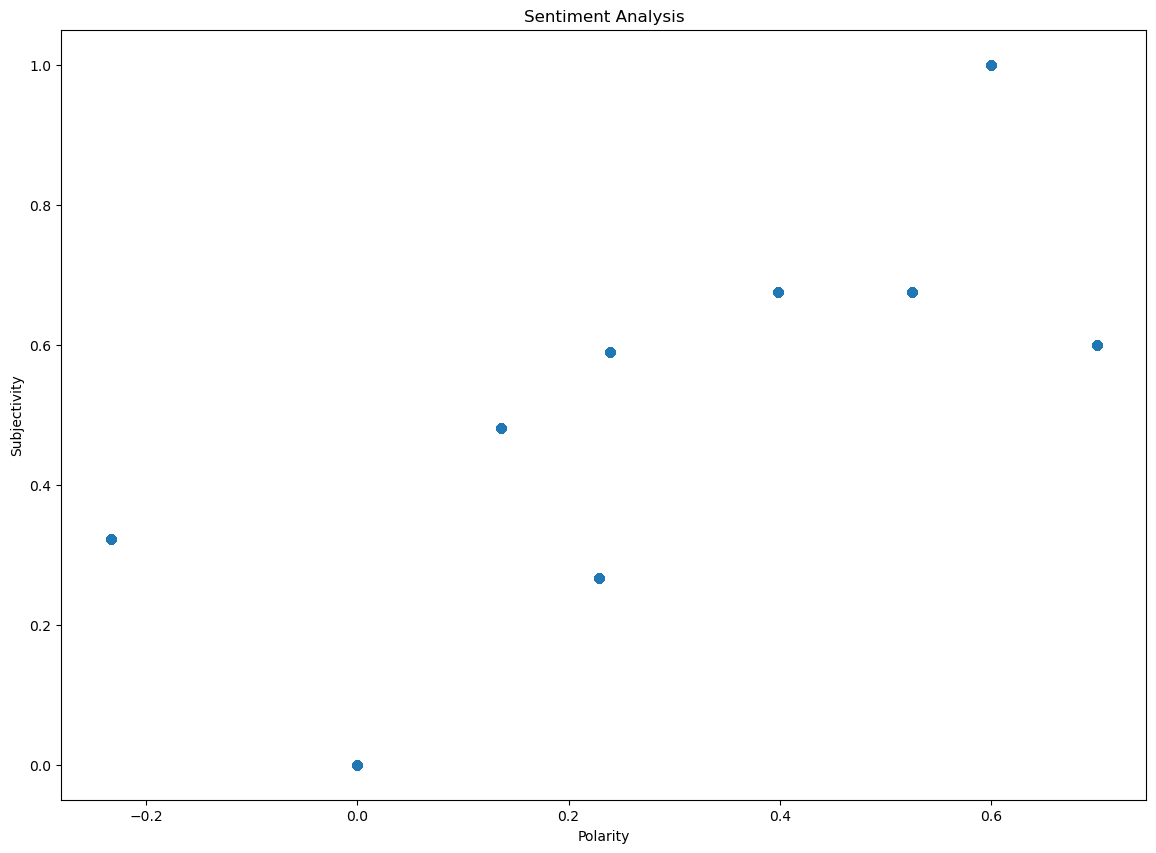

In [48]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe['Polarity'], dataframe['Subjectivity'])
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [49]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe

,Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,second purchase product last time lasted mont...,"[second, purchase, product, Last, time, lasted...",0.266667,0.229167,pos
1,nice product metal body,"[Nice, product, Metal, body]",1.000000,0.600000,pos
2,good,[Good],0.600000,0.700000,pos
3,performance wise head amazingbut wire quality ...,"[Performance, wise, head, amazingBut, wire, qu...",0.480556,0.136111,pos
4,good price,"[Good, price]",0.600000,0.700000,pos
...,...,...,...,...,...
1295,pretty crisp nice sound good budget reason giv...,"[Pretty, crisp, nice, sound, good, budget, rea...",0.675000,0.397917,pos
1296,used product sent earwax left side audible low...,"[Used, product, sent, earwax, left, side, audi...",0.322222,-0.233333,neg
1297,gud,[Gud],0.000000,0.000000,pos
1298,good quality bass also goodmic decent,"[good, quality, bass, also, goodMic, decent]",0.588889,0.238889,pos


##  Story Generation and Visualization

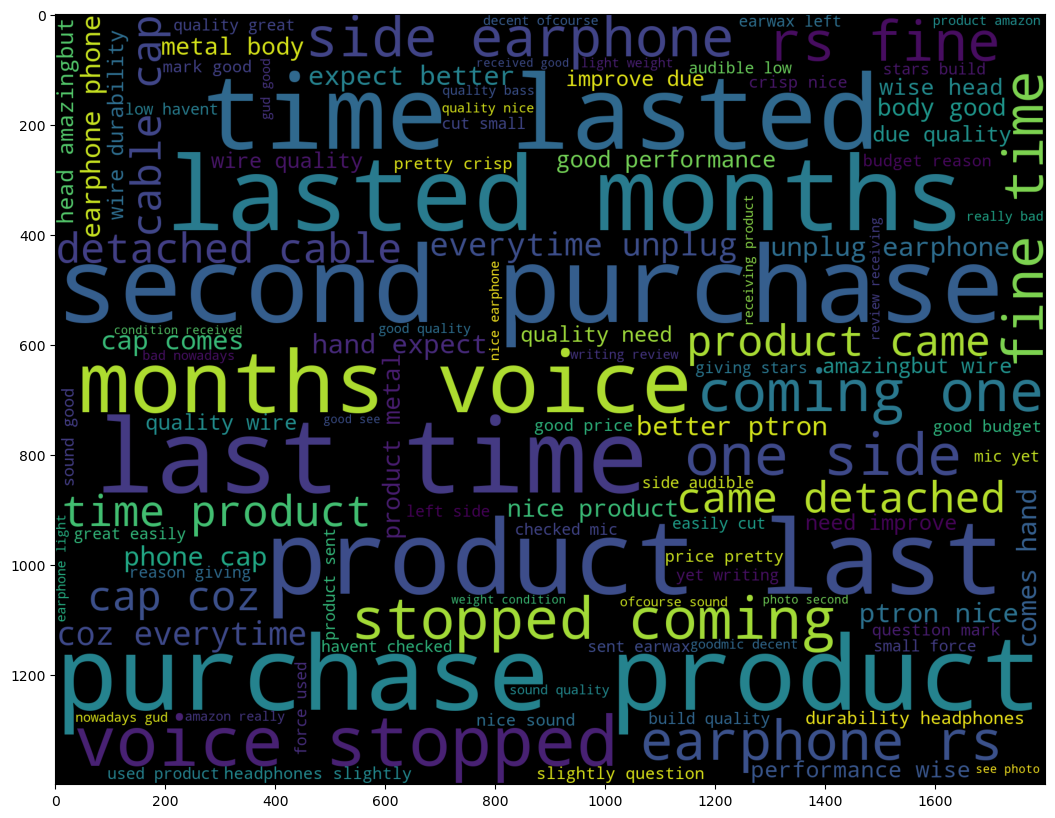

In [50]:
allWords_ = ' '.join([review for review in dataframe[:500]['Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);


## Most common words in positive Review

In [51]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

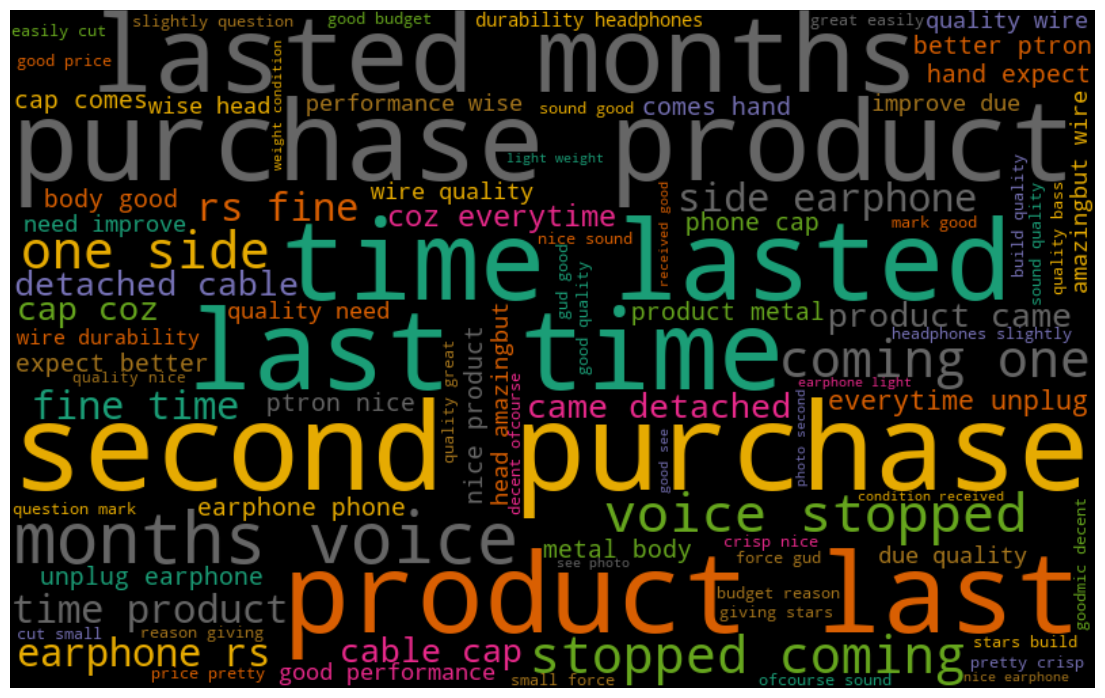

In [52]:
all_words = ' '.join([text for text in dataframe['Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

## Most common words in negative Review

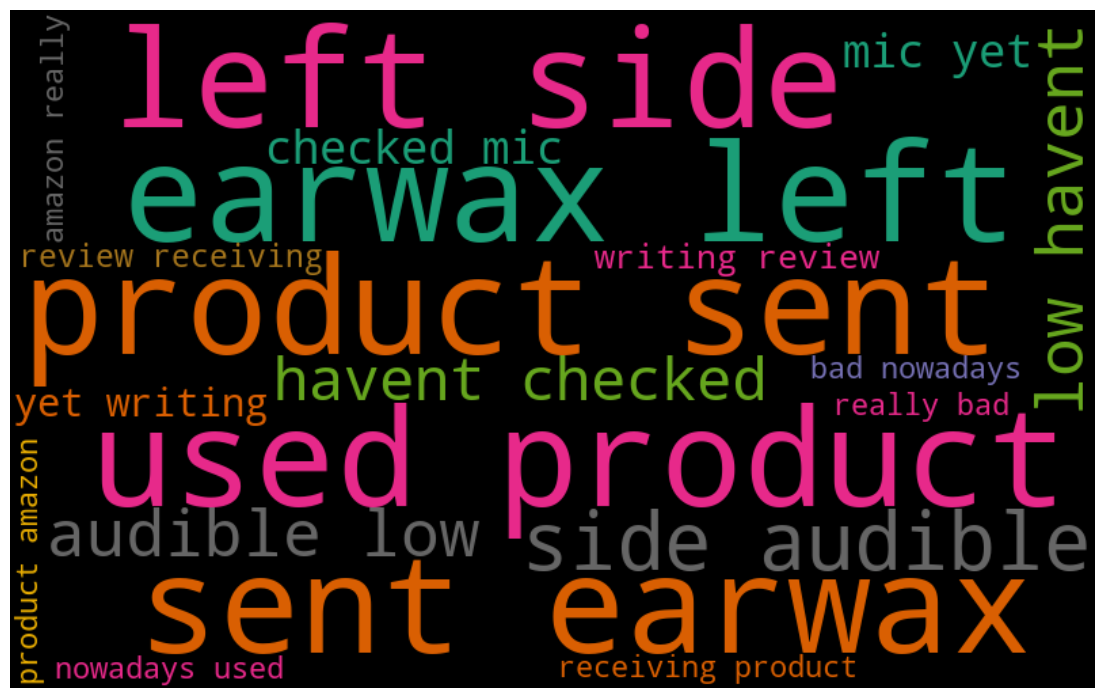

In [53]:
all_words = ' '.join([text for text in dataframe['Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)